In [1]:
import pandas as pd
import numpy as np

In [4]:
pwd

u'/Users/oliverwatson/evartech/moarf/notebooks'

In [5]:
ls .

Malaria_research.ipynb   Malaria_research3.ipynb  standardiser/
Malaria_research2.ipynb  parsed/


In [9]:
from standardiser import standardise

In [10]:
ls ../raw_data/

chemblntd_all.txt.gz  chemblntd_gsk.txt.gz


In [11]:
pwd

u'/Users/oliverwatson/evartech/moarf/notebooks'

In [12]:
df = pd.read_csv('../raw_data/chemblntd_all.txt.gz', sep='\t')

In [13]:
df

,COMPOUND_ID,SOURCES,SYNONYMS,MW_FREEBASE,ALOGP,HBA,HBD,PSA,RTB,RO3_PASS,NUM_RO5_VIOLATIONS,MED_CHEM_FRIENDLY,PCT_IHB_3D7,PCT_INHB_DD2,PCT_INHIB_3D7_PFLDH,pXC50_3D7,PCT_INHIB_HEPG2,IFI,SMILES
0,541908,"TCMDC-135431, 641908 (CHEMBL)",NaN,528.68500,3.823,6.0,1.0,66.93,9.0,N,1.0,Y,94.0,24.0,0.0,6.09857,7.0,0.79,COc1ccc(c(c1)OC)C2CCN(CC2)CCN3CCC(CC3)NC(=O)c4...
1,538495,"TCMDC-135971, 638495 (CHEMBL)",NaN,552.08749,5.109,5.0,2.0,130.72,9.0,N,2.0,Y,100.0,60.0,3.0,6.00393,36.0,7.75,C[C@H](c1ccccc1Cl)Oc2cc(sc2C(=O)N)n3cnc4c3cc(c...
2,538533,"TCMDC-140507, 638533 (CHEMBL)",NaN,489.52990,3.712,6.0,2.0,66.85,10.0,N,0.0,Y,100.0,74.0,3.0,6.79958,16.0,2.19,COc1ccc2c(c1)c(ccn2)[C@H](CN3CCC(CC3)NCCOc4ccc...
3,538571,"TCMDC-136654, 638571 (CHEMBL)",NaN,434.38194,4.780,4.0,1.0,65.63,5.0,N,0.0,Y,91.0,4.0,0.0,5.96201,17.0,23.08,COc1ccc(cc1)N(c2nc(cs2)c3cc(ccc3Cl)Cl)C4CCNCC4...
4,538605,"TCMDC-141576, 638605 (CHEMBL)",NaN,572.59858,4.069,4.0,1.0,118.26,8.0,N,1.0,Y,99.0,95.0,0.0,6.44885,0.0,2.70,CCN1CCN(C(=O)C1=O)C(=O)NC(c2cccs2)C(=O)N(C)Cc3...
5,541526,"TCMDC-124070, 641526 (CHEMBL), COMMERCIAL",NaN,452.56581,4.959,5.0,3.0,115.90,8.0,N,0.0,Y,99.0,98.0,1.0,6.12396,6.0,1.46,CCOC(=O)c1c2ccc(c(c2sc1NC(=O)c3ccccc3)O)CNC4CC...
6,541532,"TCMDC-140965, 641532 (CHEMBL)",NaN,480.39683,4.458,3.0,1.0,48.57,4.0,N,0.0,Y,97.0,76.0,0.0,6.09866,15.0,2.14,Cc1c(c2ccccc2[nH]1)C3=CCN(CC3)CCN4CCOc5c(cccc5...
7,538721,"TCMDC-123885, 638721 (CHEMBL), COMMERCIAL",NaN,288.75536,3.017,4.0,1.0,78.94,3.0,N,0.0,Y,95.0,90.0,0.0,6.11110,36.0,9.59,c1ccnc(c1)c2csc(n2)Nc3ccc(cn3)Cl
8,538723,"TCMDC-124426, 638723 (CHEMBL), COMMERCIAL",NaN,331.36458,4.760,2.0,0.0,44.37,6.0,N,0.0,Y,98.0,10.0,0.0,6.12581,5.0,7.55,c1ccc(cc1)OCCn2cc(c3c2cccc3)C(=O)c4ccco4
9,538726,"TCMDC-136429, 638726 (CHEMBL)",NaN,469.66085,6.178,3.0,1.0,35.58,7.0,N,1.0,Y,89.0,5.0,0.0,6.06405,52.0,18.40,Cc1ccccc1CN2CCCN(CC2)Cc3ccc(cc3)C(=O)Nc4ccc(cc...


OK - so first off we're just gonna predict everything in sight - starting with ALOGP (pXC50_3D7 - whatever that is?), coz it looks like the same sort of units we're used to...

Action items...
- Standardise the smiles using Isidro's standardiser (or do we even need to do this?)
- Calculate fingerprints
- predict stuff...

In [15]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from scipy import stats
import joblib
from rdkit.Chem import AllChem

In [14]:
def get_fp(sm, logfail=False):
    try:
        fp = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(sm),2,nBits=128) 
    except:
        if logfail:
            print("Cannot extract Mol from %s" % sm)
            pass
        fp = np.zeros(128)
    return fp

In [16]:
fn = 'parsed/chembl_all_fps.csv.gz'
fps = [get_fp(x) for x in df.SMILES.values]
df['fps'] = pd.Series([np.asarray(fp) for fp in fps], index=df.index)
df.to_csv(fn, compression='gzip')

RDKit ERROR: [10:36:21] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [10:36:21] Explicit valence for atom # 12 N, 4, is greater than permitted
RDKit ERROR: [10:36:26] Explicit valence for atom # 8 N, 4, is greater than permitted
RDKit ERROR: [10:36:31] Explicit valence for atom # 18 N, 4, is greater than permitted


In [26]:
preds = np.asarray([x for x in df.fps.values])

In [149]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model as LM
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge, ElasticNet, Lasso

model_dict = {'ridge' : {'m' : Ridge, 'kw' : {'fit_intercept':True, 'alpha':0.1}},
              'rcv' :  {'m' : RidgeCV, 'kw' : {}},
              'rf'    : {'m' : RandomForestRegressor, 'kw' : {'n_estimators':100, 'n_jobs':4, 'max_depth':10}}}

In [33]:
def regress(response, pred_list, one=False, do_print=True):

    regr = LM.LinearRegression(fit_intercept=one)
    regr.fit(np.asarray(pred_list).swapaxes(0, 1), response)
    
    presp = regr.predict(np.asarray(pred_list).swapaxes(0, 1))
    r2 = r2_score(response, presp)
    if do_print:
        if one:
            rs = ('%6.4f '* (len(pred_list) + 1)) % (tuple(regr.coef_) + (regr.intercept_,))
        else:
            rs = ('%6.4f '* (len(pred_list)) % tuple(regr.coef_))
        print ('Coeffs:       ' + rs)
        print ('R-squared: {:9.4f}'.format(r2))
    else:
        return regr.coef_, r2

In [50]:
def full_bootstrap(preds, resps, method, num_runs=40):

    r_2s = []
    betas = []

    N = len(resps)
    for i in range(num_runs):
        idcs = np.random.choice(N, N)
        oos = np.delete(np.arange(N), idcs)
        
        mdl = model_dict[method]['m'](**model_dict[method]['kw'])
        mdl.fit(preds[idcs], resps[idcs])
        
        beta, r2 = regress(resps[oos], [mdl.predict(preds[oos]),], do_print=False, one=False)
        if beta < 0:
            r2 *= -1
            pass
        r_2s.append(r2)
        betas.append(beta)
        pass
    
    r_2s = np.asarray(r_2s)
    betas = np.asarray(betas)
    print ('Beta:         %9.3f [%8.3f %8.3f] at 5pct conf' % 
           (np.mean(betas), np.percentile(betas, 5), np.percentile(betas, 95)))
    print ('R2 (signed):  %9.3f [%8.3f %8.3f] at 5pct conf' % 
           (np.mean(r_2s), np.percentile(r_2s, 5), np.percentile(r_2s, 95)))

Hmm... seems harder to predict (and RF is much better...)  That probably means it's interesting...

In [151]:
def run_suite(v):
    gd = ~np.isnan(df[v].values)
    print("Analyzing", v)
    for m in ['ridge', 'rcv', 'rf']:
        full_bootstrap(preds[gd], np.asarray(df[v].values[gd]), m)
    print('\n')

In [152]:
for v in ['PCT_IHB_3D7', 'PCT_INHB_DD2', 'PCT_INHIB_3D7_PFLDH', 'PCT_INHIB_HEPG2', 'IFI', 'pXC50_3D7']:
    run_suite(v)

('Analyzing', 'PCT_IHB_3D7')
Beta:             1.000 [   0.998    1.001] at 5pct conf
R2 (signed):      0.060 [   0.052    0.070] at 5pct conf
Beta:             1.000 [   0.998    1.001] at 5pct conf
R2 (signed):      0.058 [   0.048    0.071] at 5pct conf
Beta:             1.001 [   1.000    1.002] at 5pct conf
R2 (signed):      0.128 [   0.116    0.140] at 5pct conf


('Analyzing', 'PCT_INHB_DD2')
Beta:             0.995 [   0.982    1.006] at 5pct conf
R2 (signed):      0.107 [   0.095    0.117] at 5pct conf
Beta:             0.995 [   0.978    1.009] at 5pct conf
R2 (signed):      0.109 [   0.098    0.122] at 5pct conf
Beta:             1.017 [   1.003    1.030] at 5pct conf
R2 (signed):      0.257 [   0.245    0.270] at 5pct conf


('Analyzing', 'PCT_INHIB_3D7_PFLDH')
Beta:             0.959 [   0.913    1.006] at 5pct conf
R2 (signed):     -0.012 [  -0.018   -0.003] at 5pct conf
Beta:             0.948 [   0.908    0.997] at 5pct conf
R2 (signed):     -0.013 [  -0.020   -0.007] a

Adding Nick's code...

In [63]:
from rdkit.Chem import Crippen
import numpy as np

def lip_e(mols, pic50):
    logp = np.array([Crippen.MolLogP(mol) for mol in mols])
    return pic50 - logp

In [79]:
def get_crippen(x):
    try:
        cp = Crippen.MolLogP(x)
    except:
        return np.nan
    return cp

In [117]:
# According to Mark - this is the thing you really want to predict...
lip_e = df.pXC50_3D7.values - df.ALOGP.values

In [118]:
gde = ~np.isnan(lip_e)

In [119]:
full_bootstrap(preds[gde], lip_e[gde], 'ridge')

Beta:             0.987 [   0.962    1.010] at 5pct conf
R2 (signed):      0.386 [   0.372    0.400] at 5pct conf


In [153]:
full_bootstrap(preds[gde], lip_e[gde], 'rcv')

Beta:             0.994 [   0.973    1.018] at 5pct conf
R2 (signed):      0.390 [   0.369    0.412] at 5pct conf


In [120]:
full_bootstrap(preds[gde], lip_e[gde], 'rf')

Beta:             1.055 [   1.035    1.072] at 5pct conf
R2 (signed):      0.542 [   0.529    0.558] at 5pct conf


This is actually pretty cool!  So this lip_e thing is actually uncorrelated pretty much with pic_50, but that's because the Crippen thing is so highly correlated!

In [122]:
regress(lip_e[gde], df.ALOGP.values[gde][None,:])

Coeffs:       0.2193 
R-squared:   -0.6029


In [123]:
regress(lip_e[gde], df.pXC50_3D7.values[gde][None,:])

Coeffs:       0.2737 
R-squared:    0.0453


In [124]:
np.percentile(lip_e[gde], [0, 10, 50, 90, 100])

array([ -5.45498 ,  -0.335397,   1.63782 ,   3.711485,  11.41274 ])

In [101]:
np.percentile(df.ALOGP.values[gde], [0, 10, 50, 90, 100])

array([ -9.385,   2.037,   4.334,   6.457,  12.539])

In [125]:
df['lip_e'] = pd.Series(lip_e, index=df.index)

In [105]:
%pylab inline
figsize(20, 10)

Populating the interactive namespace from numpy and matplotlib


In [111]:
import seaborn as sns

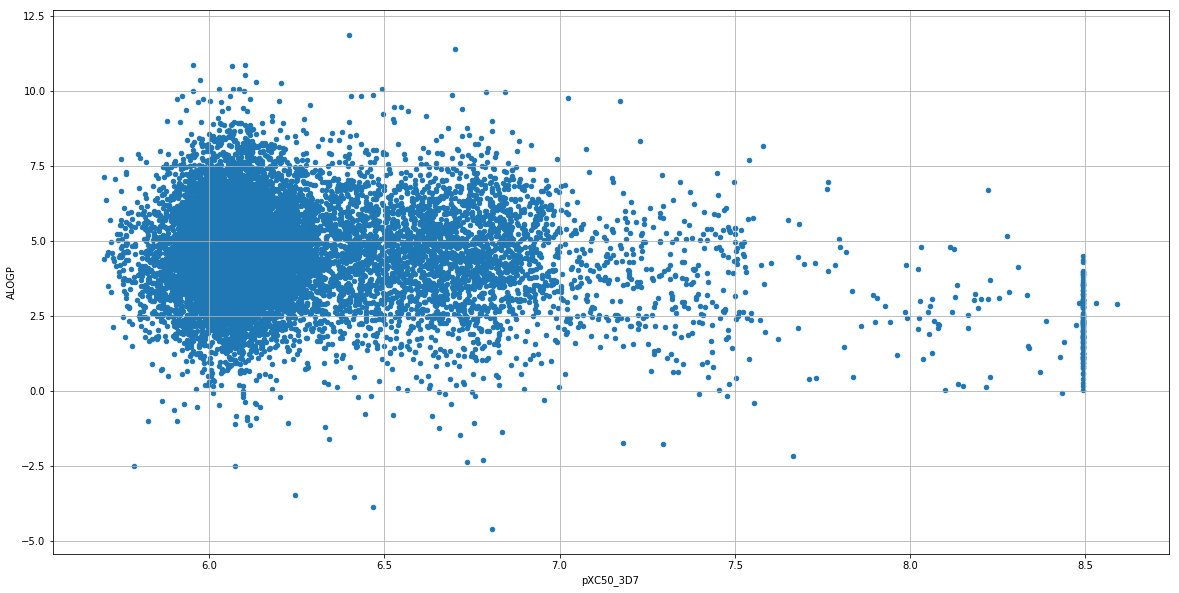

In [146]:
#  The hypothesis is that the higher the potency - the higher the greasiness (ALOGP). 
#  This relationship is controversial - and TBH, I can't exactly see it in this dataset...
df.plot.scatter('pXC50_3D7', 'ALOGP', grid=True)

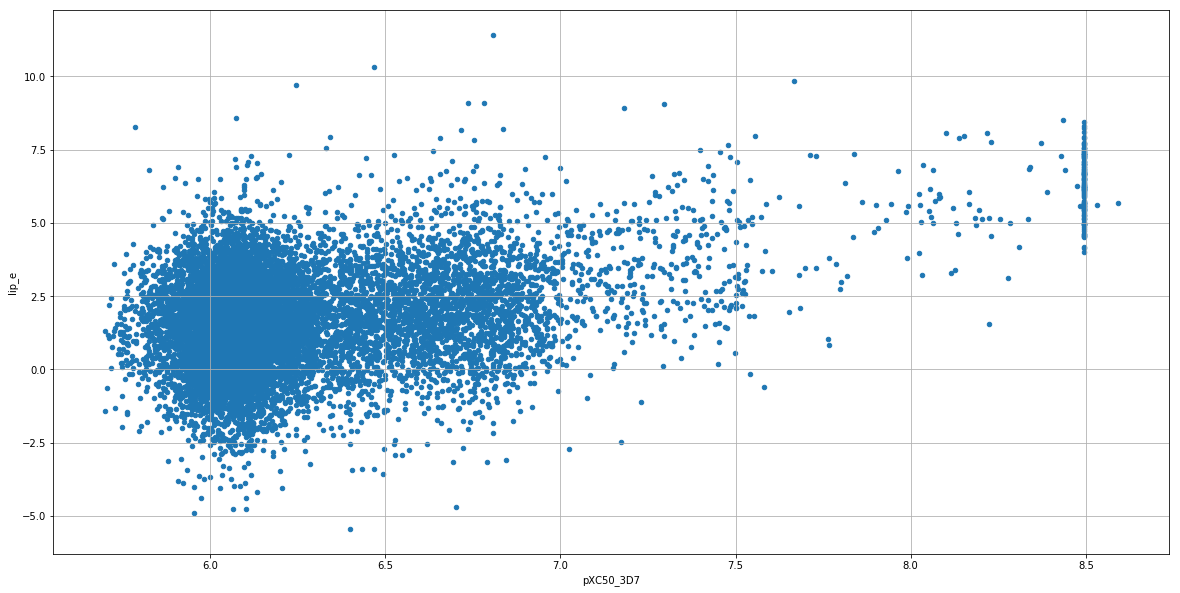

In [147]:
# This plot shows the relationship between the potency (pXC50_3D7) - and the 
# greasiness adjusted potency (lip_e).  They aren't that correlated...
df.plot.scatter('pXC50_3D7','lip_e', grid=True)

In [138]:
np.max(df.pXC50_3D7.values[~np.isnan(df.pXC50_3D7.values)])

8.5919699999999999

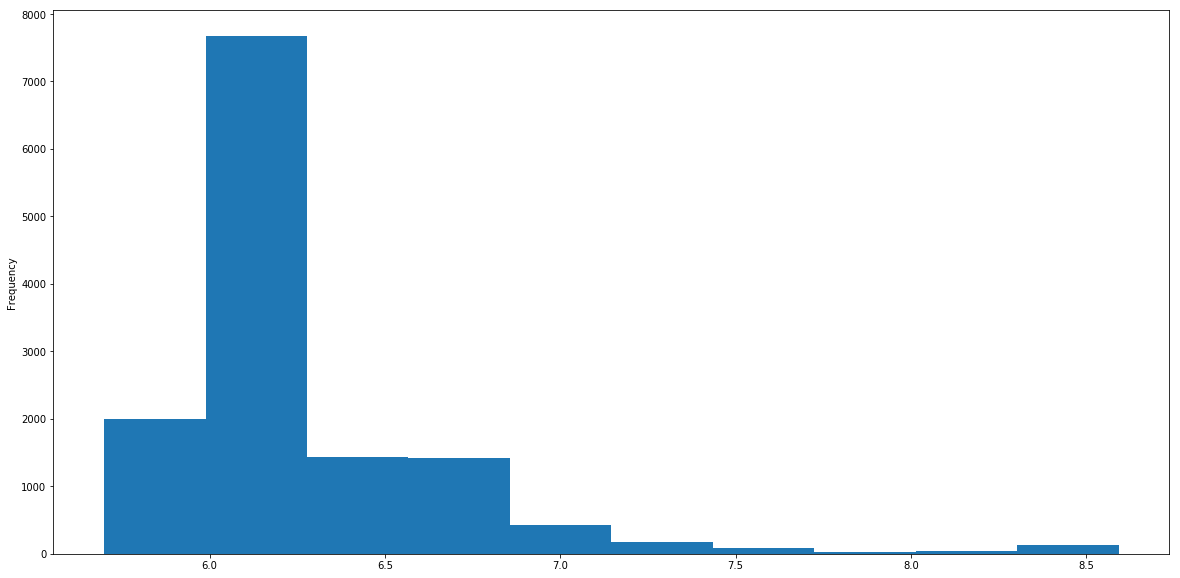

In [134]:
df.pXC50_3D7.plot.hist()

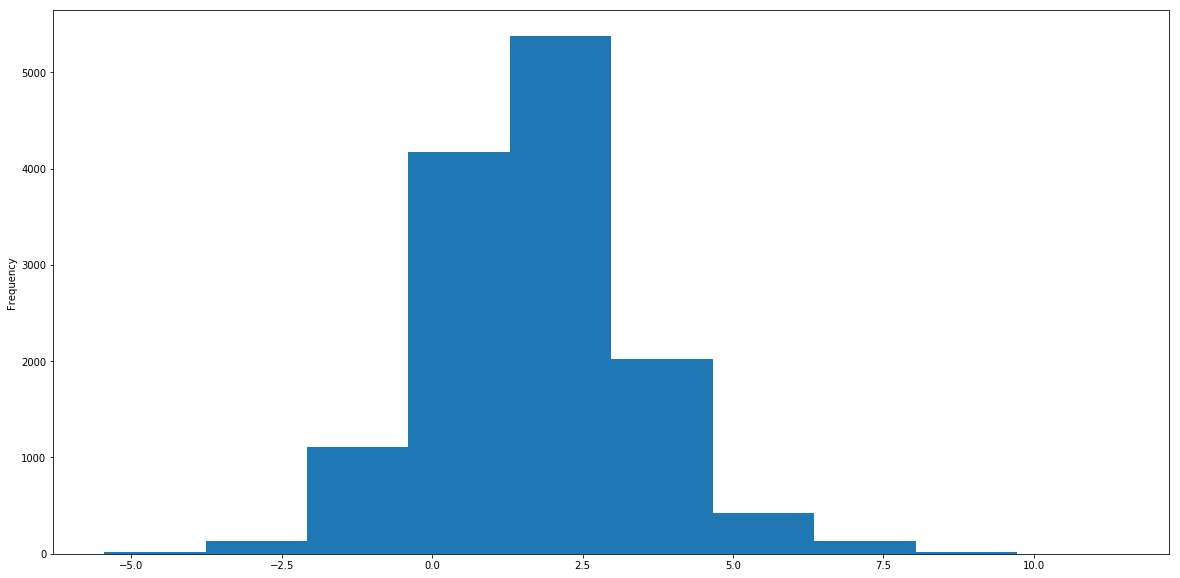

In [135]:
df.lip_e.plot.hist()

In [139]:
best_power = np.argsort(-df.pXC50_3D7.values)
best = np.argsort(-df.lip_e.values)

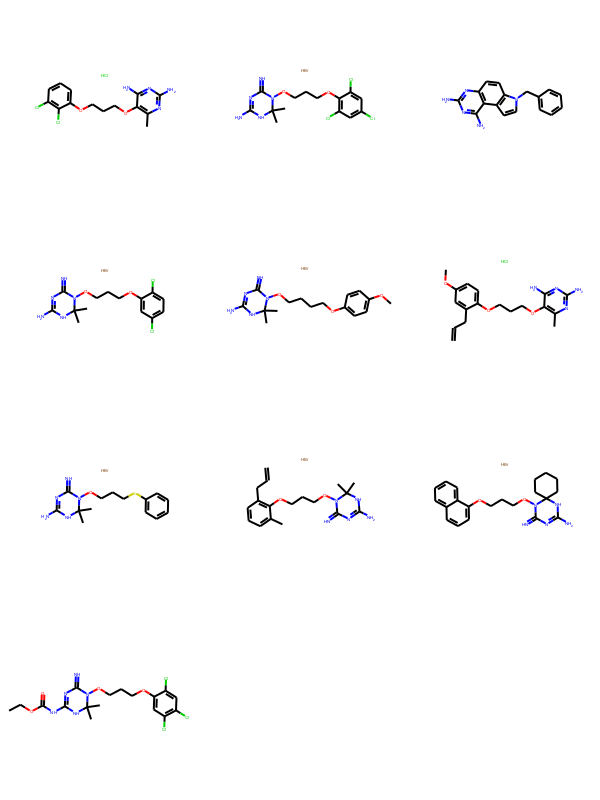

In [142]:
# Highest potency - but not accounting for greasiness...
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(df['SMILES'][df.index[x]]) for x in best_power[:10]])

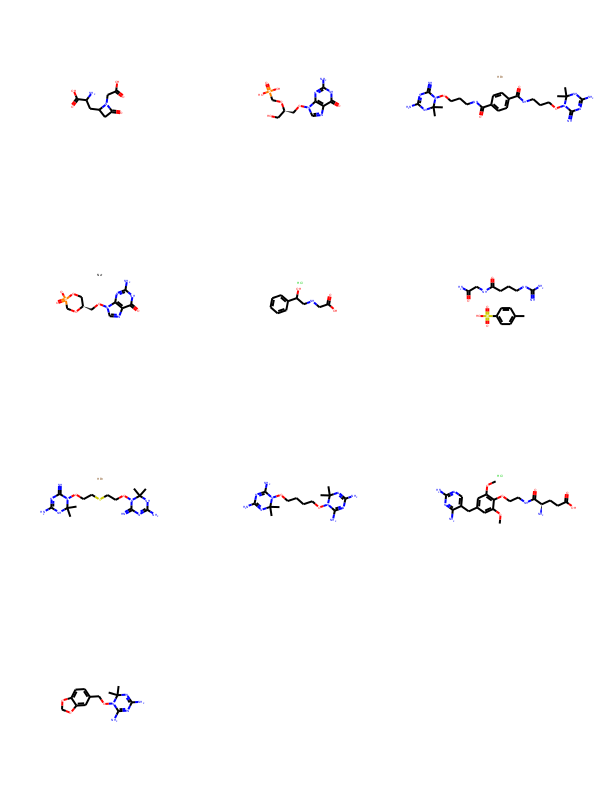

In [141]:
#  Best ones (taking into account the greasiness)
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(df['SMILES'][df.index[x]]) for x in best[:10]])

### Does Molport have an unknown cure?

Let's try and solve humanity's biggest problem in a couple of python blocks... cheaply.

In [159]:
import glob
std_files = glob.glob('/Users/oliverwatson/evartech/molport/standard_*')

In [169]:
def fit_models():
    mdls = {}
    for (lbl, resp) in {'power' : df.pXC50_3D7.values, 'lip_e' : df.lip_e.values}.items(): 
        mdls[lbl] = {}
        gd = ~np.isnan(resp)
        for typ in ['rf', 'rcv']:
            mdl = model_dict[typ]['m'](**model_dict[typ]['kw'])
            mdl.fit(preds[gd], resp[gd])
            mdls[lbl][typ] = mdl
            pass
        pass
    return mdls

In [170]:
mdl_holder = fit_models()

In [193]:
def get_results(fn, typ='lip_e', draw=True, num=10, info=True):
    df1 = pd.read_pickle(fn)
    fps = np.vstack(df1['fps'])
    
    preds_rdg = mdl_holder[typ]['rcv'].predict(fps)
    preds_rf  = mdl_holder[typ]['rf'].predict(fps)

    df_val2 = -preds_rdg - preds_rf
    
    vals = np.argsort(df_val2)[:num]
    if info:
        print('Predictions (rf)', preds_rf[vals])
        print('Predictions (ridge)', preds_rdg[vals])
        print('Prices (50MG)')
        print(df1.PRICERANGE_50MG.values[vals])
        pass
    if draw:
        return Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(df1.SMILES_CANONICAL[df1.index[x]]) for x in vals])
    else:
        return {'rf' : preds_rf[vals],  'ridge' : preds_rdg[vals],
               'prices' : df1.PRICERANGE_50MG.values[vals],
               'smiles' : df1.SMILES_CANONICAL.values[vals]
               }

### Get best 50 molecules on Power from whole set

In [195]:
def get_best(num=50, typ='power', plot=False):
    hdr = []
    for fn in std_files:
        hdr.append(get_results(fn, typ, info=False, draw=False))
        pass
    
    prices = []
    rf = []
    rdg = []
    smiles = []
    
    for datum in hdr:
        for (i, sm) in enumerate(datum['smiles']):
            prices.append(datum['prices'][i])
            rf.append(datum['rf'][i])
            rdg.append(datum['ridge'][i])
            smiles.append(sm)
            pass
        pass
    
    idxs = np.argsort(-np.asarray(rf))[:num]
    
    if not plot:
        print('Prices:', [prices[x] for x in idxs])
        print('RF:', [rf[x] for x in idxs])
        print('Ridge:', [rdg[x] for x in idxs])        
    else:
        return Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smiles[x]) for x in idxs])

In [196]:
get_best()

('Prices:', [nan, nan, nan, '100 - 500', nan, nan, '100 - 500', '100 - 500', nan, '100 - 500', nan, '100 - 500', '100 - 500', nan, '100 - 500', '100 - 500', '50 - 100', '100 - 500', '100 - 500', nan, '100 - 500', nan, '50 - 100', '100 - 500', '50 - 100', '50 - 100', nan, nan, '100 - 500', '100 - 500', '100 - 500', '50 - 100', nan, nan, '50 - 100', '50 - 100', '100 - 500', '100 - 500', nan, '50 - 100', '100 - 500', '100 - 500', '50 - 100', nan, '100 - 500', nan, '100 - 500', '100 - 500', nan, '50 - 100'])
('RF:', [7.9323347000764866, 7.8914078887327443, 7.7275782644464401, 7.7081695333440834, 7.7009628926888301, 7.6939831113774106, 7.6937384782460434, 7.6477970022759791, 7.631968173943287, 7.6241957661001507, 7.6186958819745429, 7.6061147897347379, 7.5806656412256528, 7.5768022142985636, 7.5752010333677609, 7.5580979613011383, 7.5362253931928436, 7.515229562797316, 7.50999393603907, 7.4950001374608073, 7.4814980459603859, 7.4618482622033513, 7.4585564184187305, 7.4478608039736489, 7.438

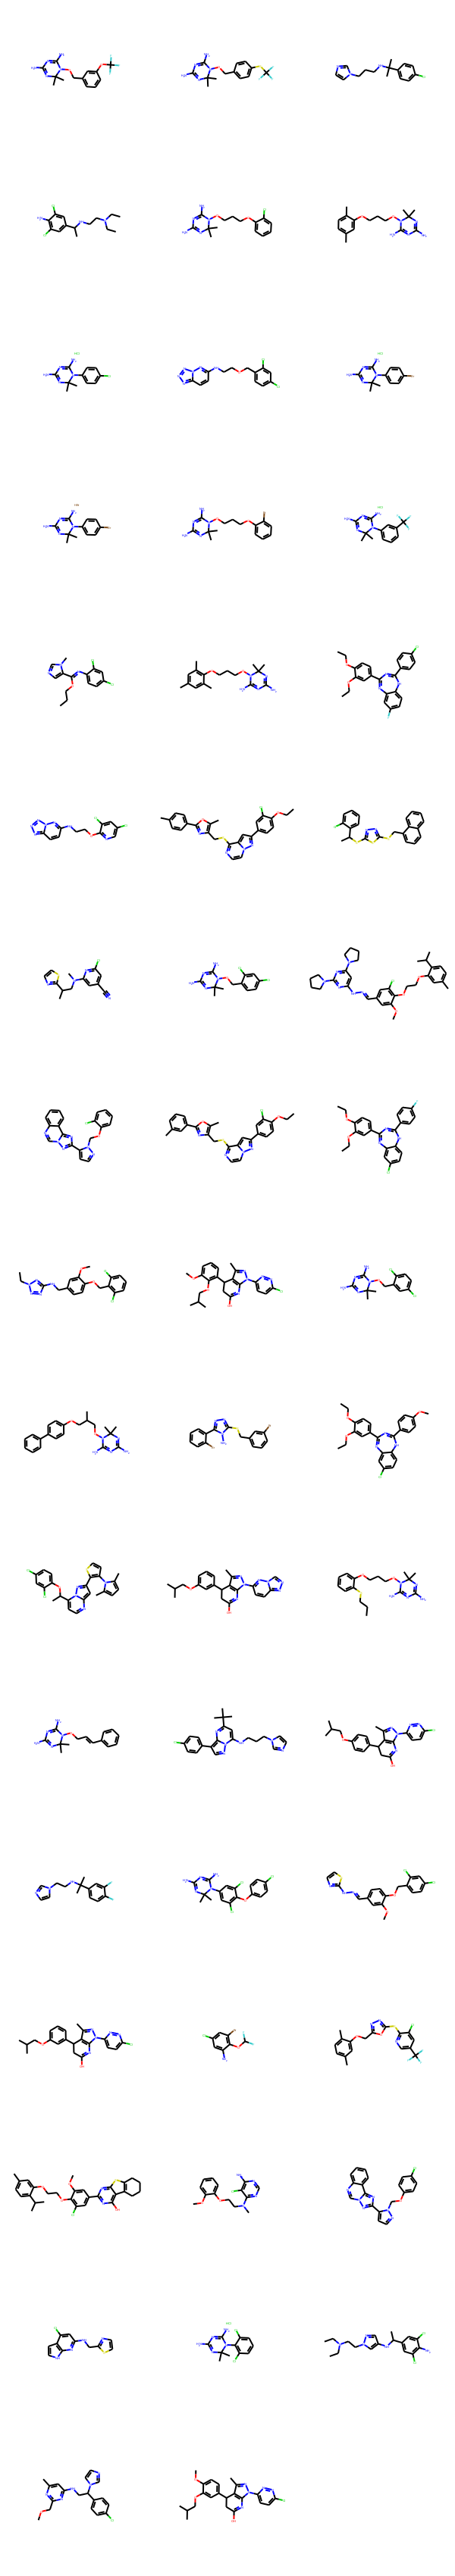

In [197]:
get_best(plot=True)

### Top 50 - taking into account greasiness...

#### NOTE - this is actually fairly poorly done, as you know the ALOGP exactly, and so rather than predicting(lip_e), you should predict potency and then subtract ALOGP.  But whatever - for now...

In [198]:
get_best(typ='lip_e')

('Prices:', ['100 - 500', nan, '> 1000', '50 - 100', '> 1000', '50 - 100', nan, '50 - 100', '100 - 500', '50 - 100', '100 - 500', '100 - 500', '100 - 500', '50 - 100', '50 - 100', nan, nan, '50 - 100', '50 - 100', '50 - 100', '< 50', '100 - 500', '100 - 500', '50 - 100', '50 - 100', nan, '50 - 100', '100 - 500', '100 - 500', '50 - 100', nan, nan, '50 - 100', '100 - 500', nan, nan, nan, '50 - 100', '100 - 500', nan, nan, '100 - 500', nan, '100 - 500', '100 - 500', '100 - 500', '50 - 100', '100 - 500', '50 - 100', '> 1000'])
('RF:', [7.4985485177645161, 7.3350438655610626, 7.306184211651134, 7.3061842116511331, 7.2162543720828758, 7.2111391873869302, 7.2111391873869284, 7.16523053466834, 7.0662704186634206, 6.9822661635289549, 6.9640244486606511, 6.9640244486606502, 6.9640244486606502, 6.9291632579301883, 6.9291632579301856, 6.9215186544389864, 6.9215186544389864, 6.9134085671767744, 6.8991489005101085, 6.8991489005101085, 6.8438518579301872, 6.8183840809535203, 6.8067784016894617, 6.694

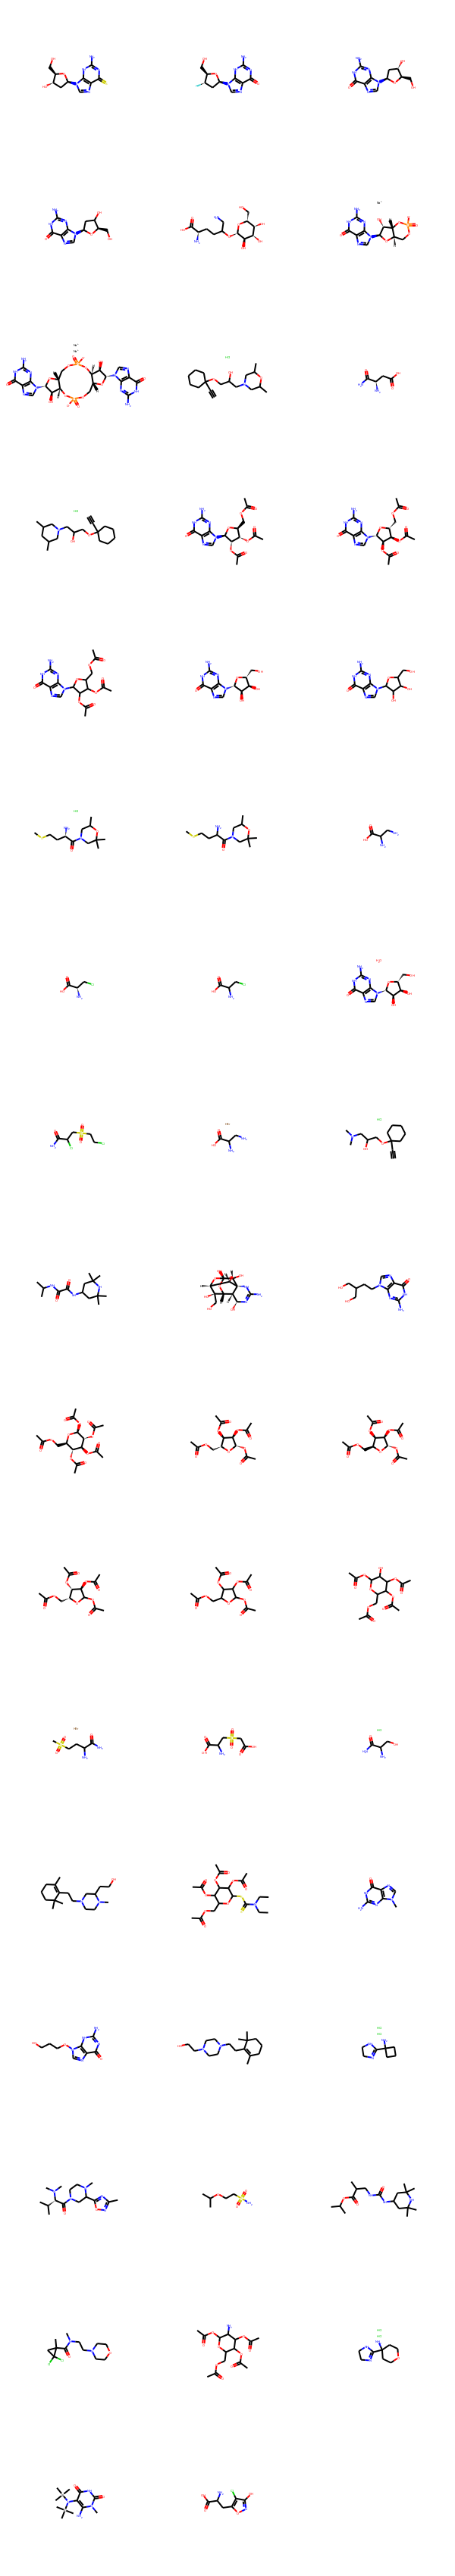

In [199]:
get_best(typ='lip_e', plot=True)